In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Define the path to the saved model
saved_model_path = r'/content/drive/MyDrive/R&D Project/Models/Customized_EfficientNetV2_Model_Unfrozen.tf'

# Load the saved model
model = tf.keras.models.load_model(saved_model_path)

# Define additional training parameters
epochs = 10  # Number of epochs to train
batch_size = 40

# Preparing data generators for training and validation
data_path = r'/content/drive/MyDrive/R&D Project/Datasets/Dataset (Vehicles)'

In [ ]:
# Training data generator with validation split
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_path + '/train',  # Use the training set directory directly
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    data_path + '/train',  # Use the training set directory directly
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Testing data generator
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    data_path + '/test',  # Use the testing set directory directly
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3640 images belonging to 5 classes.
Found 910 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


In [ ]:
# Define a ModelCheckpoint callback to save the model during training
checkpoint_callback = ModelCheckpoint(saved_model_path, monitor='val_loss', save_best_only=True, mode='min')

# Training the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[checkpoint_callback]
)

history_filename = '/content/drive/MyDrive/R&D Project/Histories/EfficientNetModel_training_history.pkl'
try:
    # Load previous history if available
    with open(history_filename, 'rb') as file:
        previous_history = pickle.load(file)
except FileNotFoundError:
    previous_history = {'loss': [], 'val_loss': []}

# Append the new training history to the existing one
for key in ['loss', 'val_loss']:
    previous_history[key].extend(history.history[key])

# Save the updated history to the file
with open(history_filename, 'wb') as file:
    pickle.dump(previous_history, file)

Epoch 1/10
91/91 [==============================] - 350s 3s/step - loss: 0.0228 - accuracy: 0.9940 - val_loss: 0.0737 - val_accuracy: 0.9901
Epoch 2/10
91/91 [==============================] - 273s 3s/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0529 - val_accuracy: 0.9912
Epoch 3/10
91/91 [==============================] - 288s 3s/step - loss: 0.0136 - accuracy: 0.9951 - val_loss: 0.0235 - val_accuracy: 0.9945
Epoch 4/10
91/91 [==============================] - 129s 1s/step - loss: 0.0225 - accuracy: 0.9937 - val_loss: 0.0328 - val_accuracy: 0.9989
Epoch 5/10
91/91 [==============================] - 128s 1s/step - loss: 0.0233 - accuracy: 0.9942 - val_loss: 0.0412 - val_accuracy: 0.9956
Epoch 6/10
91/91 [==============================] - 129s 1s/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0649 - val_accuracy: 0.9956
Epoch 7/10
91/91 [==============================] - 127s 1s/step - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0447 - val_accuracy: 0.9956
Epoch 8/10
91

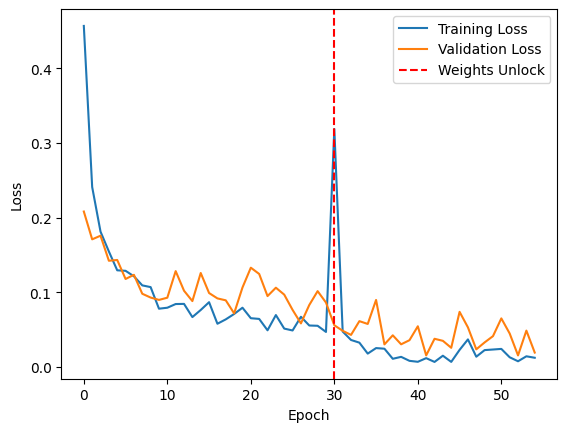

In [ ]:
history_filename = '/content/drive/MyDrive/R&D Project/Histories/EfficientNetModel_training_history.pkl'

# Load the training history from the file
try:
    with open(history_filename, 'rb') as file:
        history = pickle.load(file)
except FileNotFoundError:
    print(f"No history file found: {history_filename}")
    history = {'loss': [], 'val_loss': []}

# Plot training loss and validation losses
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')

# Add a vertical line at the 30th epoch to indicate weights unlocking
epoch_unlocked = 30
plt.axvline(x=epoch_unlocked, color='r', linestyle='--', label='Weights Unlock')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate model accuracy on the testing set
accuracy = model.evaluate(test_generator)[0]
print(f'Custom EfficientNet\'s Accuracy on Testing Set: {accuracy * 100:.2f}%')

7/7 [==============================] - 49s 6s/step - loss: 0.1431 - accuracy: 0.9680
Custom EfficientNet's Accuracy on Testing Set: 96.80%
